# Week 3: Classification - K-Means Clustering (Solution)

This notebook will focus on **k-means clustering**, a popular unsupervised learning algorithm. We will use the k-means algorithm to cluster data points into $k$ clusters! 

In [1]:
# Load data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [2]:
# Display the shape of X and y
X.shape, y.shape

((150, 4), (150,))

## K-Means Clustering Using Scikit-Learn

We first demonstrate the use of two components of the Scikit-Learn library for machine learning: clustering using K-Means and dimensionality reduction using Principal Component Analysis. The first step is to import the necessary modules, KMeans from sklearn.cluster and PCA from sklearn.decomposition. Write some that code that initializes a K-Means clustering model with three clusters. Then, fit the K-Means model to the data represented by the variable X.

A PCA is used to reduce the data's dimensionality to 2D to create a scatter plot to visualize the data points, each coloured according to its cluster assignment.

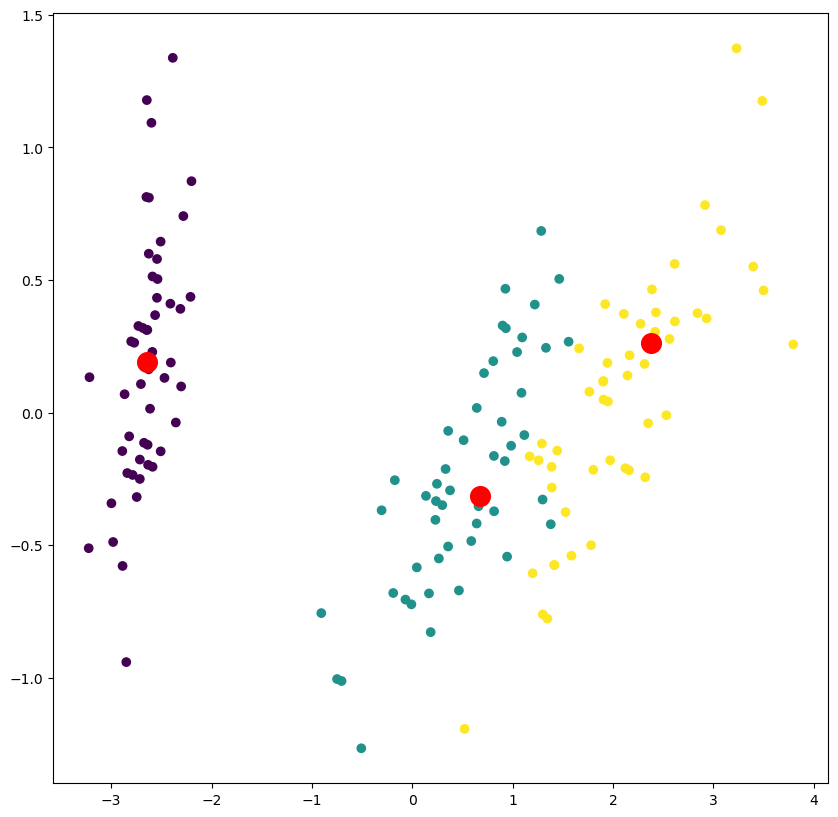

In [3]:
# K-Means Clustering Using Scikit-Learn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### SOLUTION
km = KMeans(n_clusters=3, random_state=0)
km.fit(X)
### SOLUTION

# Visualize the results
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
centroids = pca.transform(km.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c="red")


plt.show()


## The Elbow Method
We can use the elbow method to find the number of clusters we need. An elbow of a curve is a point where the curve visibly changes direction. In the case of the elbow method, we are looking for the point where the curve starts to flatten out. This point is the optimal number of clusters.

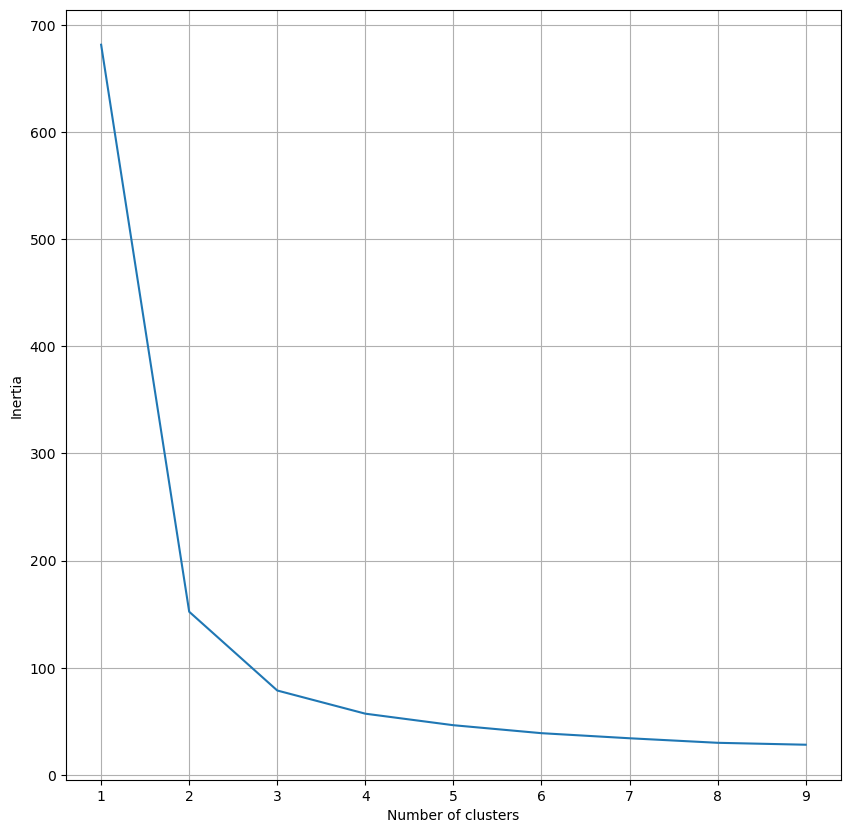

In [4]:
# Elbow Method

from sklearn.cluster import KMeans

# Try different values of k
k_range = range(1, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    scores.append(km.inertia_)

# Plot the results
plt.figure(figsize=(10, 10))
plt.plot(k_range, scores)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## K-Means By Hand

The k-means algorithm can be broken down into multiple steps. Our aim is to minimise the sum of squared distances between each data point and its corresponding cluster centroid. This equation can be written as: 

$$\Theta = \sum_{i}^{n} \sum_{j}^{k} \rho^{i[j]} ||x^{i} - \mu^{[j]}||^2_2$$

where $n$ is the number of data points, $k$ is the number of clusters, $x^{i}$ is the $i^{th}$ data point, $\mu^{[j]}$ is the $j^{th}$ cluster centroid, and $\rho^{i[j]}$ is the indicator function which is equal to 1 if $x^{i}$ belongs to cluster $j$ and 0 otherwise.

The algorithm follows the following format:

1. Initialise cluster centroids $\mu^{j}$ for $j = 1, ..., k$.
2. **E-Step**: Minimise $\Theta$ with respect to $\rho^{i[j]}$ for $i = 1, ..., n$ and $j = 1, ..., k$, keeping $\mu^{[j]}$ fixed.
3. **M-Step**: Minimise $\Theta$ with respect to $\mu^{[j]}$ for $j = 1, ..., k$, keeping $\rho^{i[j]}$ fixed.
4. Repeat steps 2 and 3 until convergence.


### E-Step
Each term is independent of each other so we can minimise $\Theta$ with respect to $\rho^{i[j]}$ for $i = 1, ..., n$ and $j = 1, ..., k$ separately.
We can use the following formula to calculate $\rho^{i[j]}$:

$$\rho^{i[j]} = \begin{cases} 
      1 & \text{if } j = \text{argmin}_{l} ||x^{i} - \mu^{[l]}||^2_2 \\
      0 & \text{otherwise}
   \end{cases}$$

Ties can be broken arbitrarily.

### M-Step
We can take the derivative of $\Theta$ with respect to $\mu^{[j]}$ and set it to 0 to find the optimal $\mu^{[j]}$. Doing this, and rearranging, we get:

$$\mu^{[j]} = \frac{\sum_{i}^{n} \rho^{i[j]} x^{i}}{\sum_{i}^{n} \rho^{i[j]}}$$


For the code below, please fill in the line that computes the distance between each data point and the centroid. Below the E-step, implement the M-step which updates the centroid position to be the mean location of the cluster data points.

In [5]:
def kmeans(X, k, max_iter=1000, random_state=42):
    
    # Step 1: Initialize the centroids
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for epoch in range(max_iter):
        # There are several numpy functions that can be used to optimize the following code
        # however we will use the long version for the sake of clarity


        # E-Step (Assign points to the nearest cluster centroid)
        rhos = np.zeros((n_samples, k))
        for i in range(n_samples):
            distances = np.zeros(k)
            for j in range(k):
                ### SOLUTION
                distances[j] = np.linalg.norm(X[i] - centroids[j])
                ### SOLUTION
            rhos[i, np.argmin(distances)] = 1
        
        ### SOLUTION
        # M-Step (Update centroid location)
        new_centroids = np.zeros((k, n_features))
        for j in range(k):
            for i in range(n_samples):
                new_centroids[j] += rhos[i, j] * X[i]
            new_centroids[j] /= np.sum(rhos[:, j])
        ### SOLUTION
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids



The code below shows the outcome of your code on a plot! How well did you do?

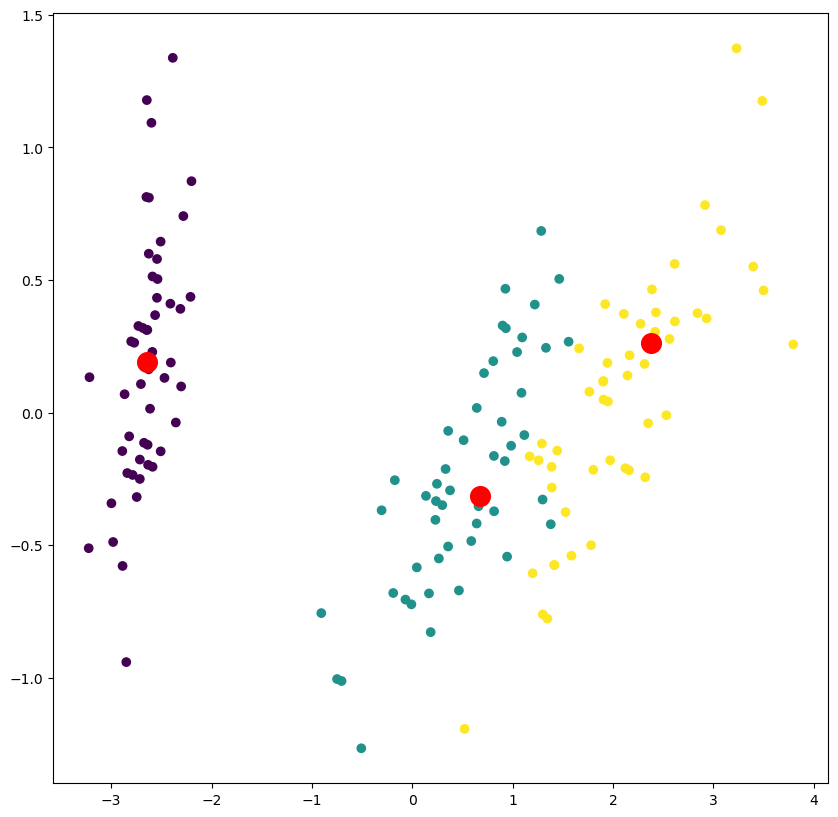

In [6]:

centroids = kmeans(X, k=3)

# Visualize the results
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
centroids = pca.transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c="red")
plt.show()
